# **Performance Metrics for Classification Problems**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
## Missing Values
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [3]:
## Remove missing values (not recommended - imputing is preferred)
df.dropna(inplace = True)

In [5]:
## X Matrix and y vector
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

In [8]:
## y variable
y.value_counts() / len(y)

0    0.847648
1    0.152352
Name: TenYearCHD, dtype: float64

In [ ]:
## If I flip a coin and determine if someone would get CHD by the flip of the coin
## I am expected to get 85% accuracy

In [9]:
## Split the data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 591)

## **Logistic Regression**

* sklearn: predictive models (no p-values)
* statsmodel.api: descriptive models (p-value, statistics,...)

In [11]:
import statsmodels.api as sm

## instance and fit
lr = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.383254
         Iterations 7


In [13]:
## p-values
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2559
Model:                          Logit   Df Residuals:                     2543
Method:                           MLE   Df Model:                           15
Date:                Wed, 11 Oct 2023   Pseudo R-squ.:                  0.1050
Time:                        20:47:59   Log-Likelihood:                -980.75
converged:                       True   LL-Null:                       -1095.7
Covariance Type:            nonrobust   LLR p-value:                 1.597e-40
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.2405      0.850     -8.514      0.000      -8.907      -5.574
male                0.5005      0.129      3.885      0.000       0.248       0.753
age                 0.0584      

In [16]:
## Propensities (risk)
phat_model1 = lr.predict(sm.add_constant(X_test))

In [23]:
## prediction at 50% cutoff
yhat_model1 = (phat_model1 > 0.5).astype('int')

## **Random Forest**

* sklearn: predictive

In [24]:
from sklearn.ensemble import RandomForestClassifier

## instance
rf = RandomForestClassifier(random_state = 591)

## fit
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=591)

In [26]:
## Predictions
yhat_model2 = rf.predict(X_test)

In [30]:
## Propensities
phat_model2 = rf.predict_proba(X_test)[:,1]

## **Confusion Matrix**

Table of predictions versus actual

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
## we need a prediction y_hat, y_pred = {0, 1}
confusion_matrix(y_test, yhat_model1)

array([[930,   2],
       [151,  14]])

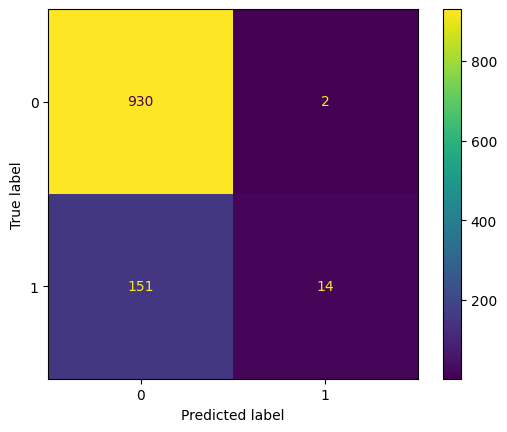

In [34]:
## even better
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model1)).plot()

In [36]:
## Accuracy
(930 + 14) / len(y_test)

0.8605287146763901

In [37]:
## accuracy_score in sklearn
from sklearn.metrics import accuracy_score

accuracy_score(y_test, yhat_model1)

0.8605287146763901

In [ ]:
## Model 1 does not do too different than the benchmark (0.84959 acc)

In [38]:
y_test.value_counts() / len(y_test)

0    0.84959
1    0.15041
Name: TenYearCHD, dtype: float64

Random Forest

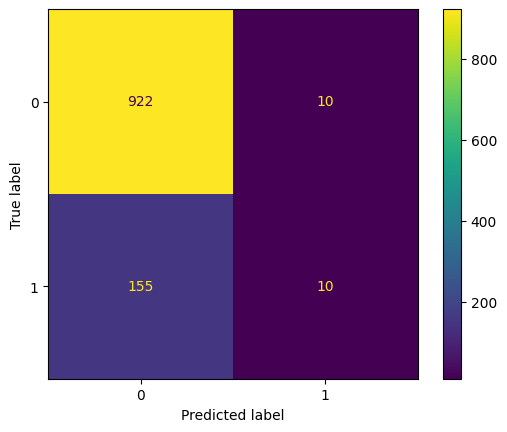

In [39]:
## Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model2)).plot()

In [40]:
accuracy_score(y_test, yhat_model2)

0.8495897903372835

In [42]:
## Misclassification Rate
print(f'The error for the LR is: {1 - accuracy_score(y_test, yhat_model1)}')
print(f'The error for the RF is: {1 - accuracy_score(y_test, yhat_model2)}')

The error for the LR is: 0.13947128532360986
The error for the RF is: 0.15041020966271645


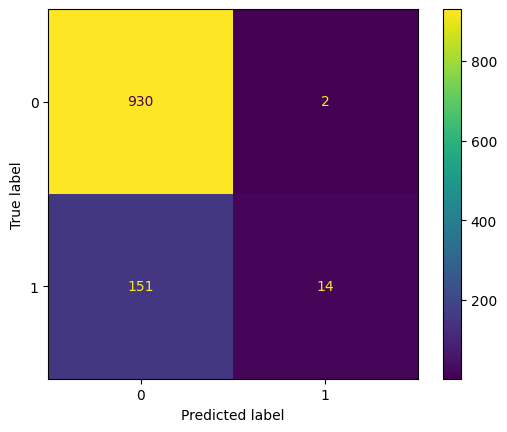

In [43]:
## even better
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model1)).plot()

In [44]:
# recall, true positive rate, detection rate
## the higher the better
Sensitivity = 14 / (151+14)
Sensitivity

0.08484848484848485

In [45]:
## recall_score in sklearn
from sklearn.metrics import recall_score

recall_score(y_test, yhat_model1)

0.08484848484848485

In [46]:
## Sensitivity, Recall
print(f'The detection rate for the LR is: {recall_score(y_test, yhat_model1)}')
print(f'The detection rate for the RF is: {recall_score(y_test, yhat_model2)}')

The detection rate for the LR is: 0.08484848484848485
The detection rate for the RF is: 0.06060606060606061


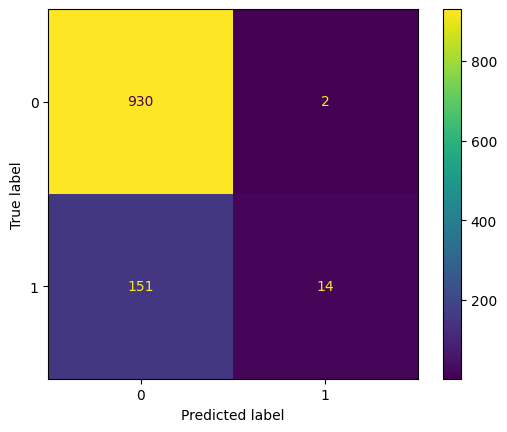

In [47]:
## even better
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model1)).plot()

In [48]:
Specificity = 930 / (930+2)
Specificity

0.9978540772532188

In [49]:
## You can get the specificity and the sensitivity in a matrix
confusion_matrix(y_test, yhat_model1, normalize = "true")

array([[0.99785408, 0.00214592],
       [0.91515152, 0.08484848]])

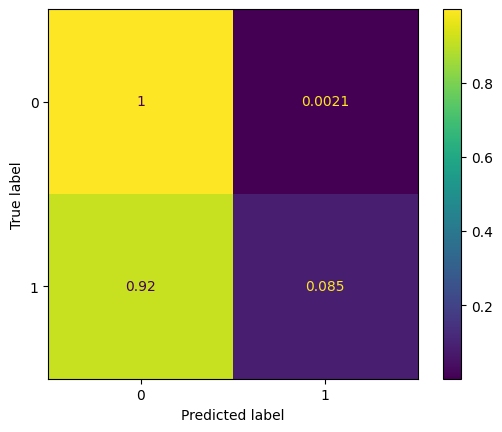

In [50]:
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model1, normalize = "true")).plot()

**What if we used a different threshold other than 50%?**

accuracy: 0.1504102096627165
detection rate (sensitivity): 1.0


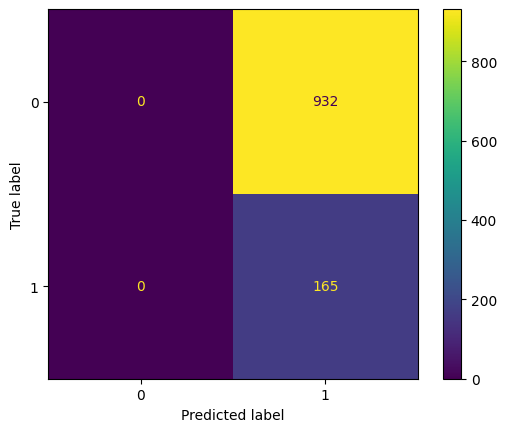

In [56]:
## let's change the threshold and check the performance
yhat_model1 = (phat_model1 > 0.01).astype('int')
print(f'accuracy: {accuracy_score(y_test, yhat_model1)}')
print(f'detection rate (sensitivity): {recall_score(y_test, yhat_model1)}')

ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_model1)).plot();